# Credit Loan Prediction Analysis

In [25]:
import pandas as pd
import numpy as np

In [27]:
credit_df = pd.read_csv('credit_risk.csv')

In [28]:
credit_df

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26


Visual:

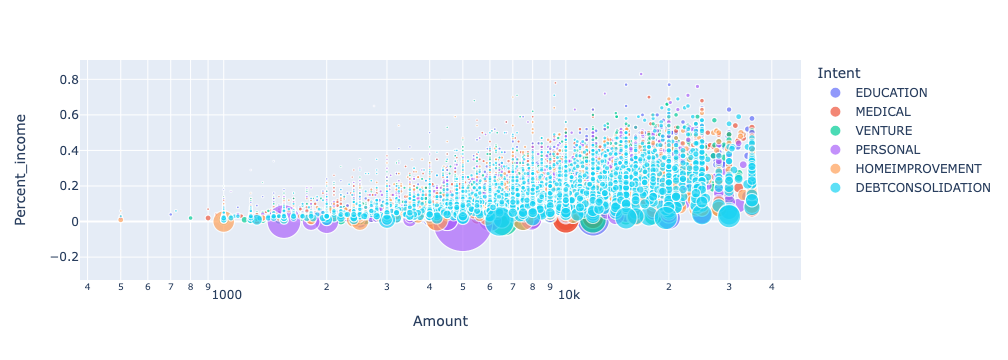

In [36]:
import plotly.express as px
df = px.data.gapminder()

fig = px.scatter(credit_df[credit_df['Default']== 'N'], x="Amount", y="Percent_income",
                 size="Income", color="Intent",
                 hover_name="Intent", log_x=True, size_max=60)
fig.show()

#### Data Preperation

In [4]:
# Drop unneccessary Features 
credit = credit_df.drop('Id', axis=1)

In [5]:
# get dummy variables for categorical variables
credit = pd.get_dummies(credit, columns=['Home', 'Intent', 'Default'])

In [6]:
#Finding the mean of the columns Emp_Length and Rate that have NaN values
mean_emp=credit['Emp_length'].mean() 
mean_rate=credit['Rate'].mean() 

# Replace NaNs in columns above with the mean of values in those same columns 
credit['Emp_length'].fillna(value=mean_emp, inplace=True) 
credit['Rate'].fillna(value=mean_rate, inplace=True) 

In [7]:
# Splitting data into features (X) and target being status of loan approval
x = credit.drop(columns=['Status'])
y = credit['Status']

In [37]:
credit

,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length,Home_MORTGAGE,Home_OTHER,Home_OWN,Home_RENT,Intent_DEBTCONSOLIDATION,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Intent_VENTURE,Default_N,Default_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,0,0,0,1,0,0,0,0,1,0,0,1
1,21,9600,5.0,1000,11.14,0,0.10,2,0,0,1,0,0,1,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,1,0.57,3,1,0,0,0,0,0,0,1,0,0,1,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,0,1,0,0,0,1,0,0,1,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30,1,0,0,0,0,0,0,0,1,0,1,0
32577,54,120000,4.0,17625,7.49,0,0.15,19,1,0,0,0,0,0,0,0,1,0,1,0
32578,65,76000,3.0,35000,10.99,1,0.46,28,0,0,0,1,0,0,1,0,0,0,1,0
32579,56,150000,5.0,15000,11.48,0,0.10,26,1,0,0,0,0,0,0,0,1,0,1,0


In [8]:
from sklearn.model_selection import train_test_split
# Splitting the dataset into a training and testing set

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=100)

In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [ ]:
# The baseline predictions are the historical averages
baseline_preds = X_test[:, feature_list.index('average')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - y_test)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))
Average baseline error:  5.06 degrees.

#### Logistic Regression Model 

In [9]:
# import class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=42)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [10]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[10004,   183],
       [ 2377,   469]])

Text(0.5, 427.9555555555555, 'Predicted label')

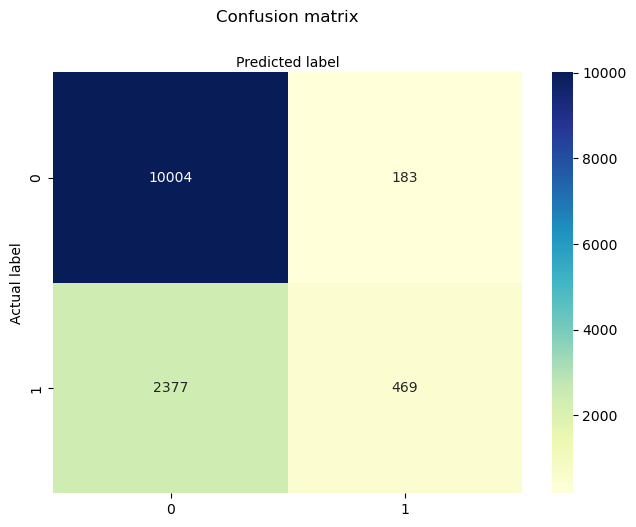

In [11]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# small class inbalance its not enough that needs over sampling, incluse over sampling 

In [12]:
from sklearn.metrics import classification_report
target_names = ['Loan decline', 'loan approval']
print(classification_report(y_test, y_pred, target_names=target_names))

               precision    recall  f1-score   support

 Loan decline       0.81      0.98      0.89     10187
loan approval       0.72      0.16      0.27      2846

     accuracy                           0.80     13033
    macro avg       0.76      0.57      0.58     13033
 weighted avg       0.79      0.80      0.75     13033



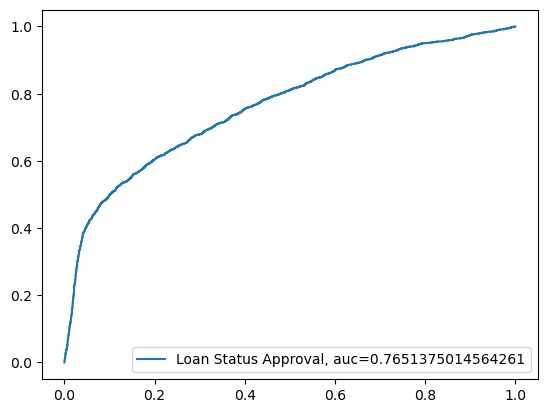

In [13]:
#Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate.

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Loan Status Approval, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Random Forest Model 

In [14]:
# Initialize the Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [15]:
# Train the model
rf_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [24]:
# # Performance metrics
# errors = abs(y_pred - y_test)
# print('Metrics for Random Forest Trained on Expanded Data')
# print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')
# # Calculate mean absolute percentage error (MAPE)
# mape = np.mean(100 * (errors / y_test))
# # Compare to baseline
# improvement_baseline = 100 * abs(errors - mape) / mape
# print('Improvement over baseline:', round(improvement_baseline, 2), '%.')

Metrics for Random Forest Trained on Expanded Data
Average absolute error: 0.08 degrees.
Improvement over baseline: 10775   NaN
28127   NaN
17835   NaN
15419   NaN
20158   NaN
         ..
12700   NaN
25674   NaN
1455    NaN
29488   NaN
4718    NaN
Name: Status, Length: 13033, dtype: float64 %.


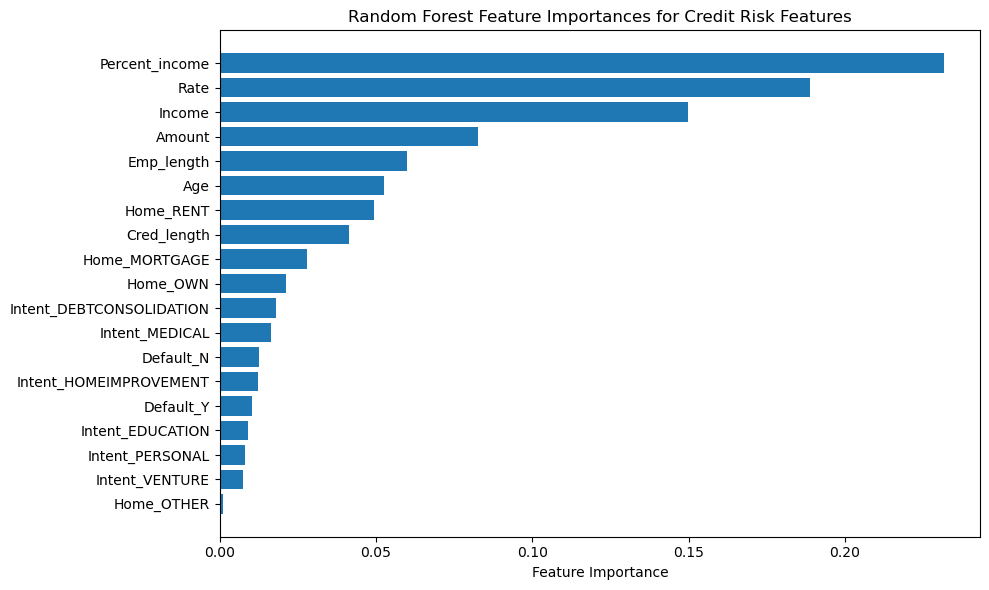

In [17]:
# Plotting feature importance
import matplotlib.pyplot as plt

feature_importances = rf_classifier.feature_importances_
feature_names = x.columns
sorted_idx = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances for Credit Risk Features")
plt.tight_layout()
plt.show()

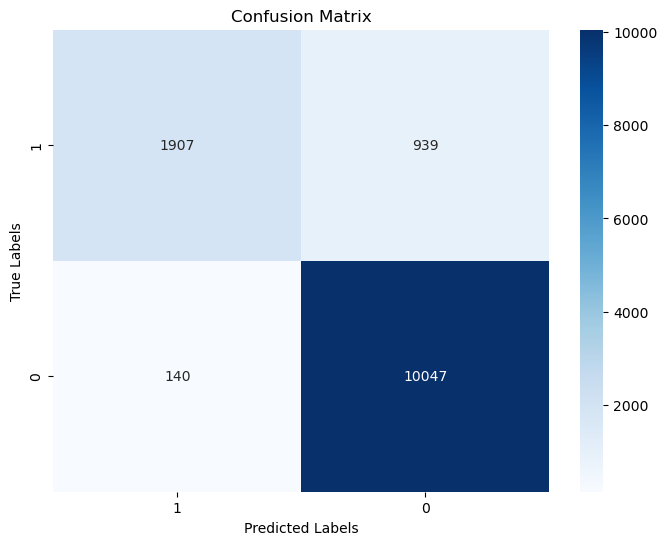

In [18]:
# Plotting confusion matrix
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred, labels=y.unique())
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [19]:
# Accuracy and Classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:", classification_rep)


Accuracy: 0.9172101588275915
Classification Report:               precision    recall  f1-score   support

           0       0.91      0.99      0.95     10187
           1       0.93      0.67      0.78      2846

    accuracy                           0.92     13033
   macro avg       0.92      0.83      0.86     13033
weighted avg       0.92      0.92      0.91     13033

